In [4]:
import sys
sys.path.append("..")

from core import coeffs, intersection_points

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Ellipse
%matplotlib inline

In [5]:
def draw_oblate(b, xo, yo, ro):
    # Set up the figure
    #theta in degrees
    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.set_xlim(min(-1.01, xo - ro - 0.01), max(1.01, xo + ro + 0.01));
    ax.set_ylim(min(-1.01, yo - ro - 0.01), max(1.01, yo + ro + 0.01));
    ax.set_aspect(1);
    ax.axis('off');

    # Draw the star
    occulted = Circle((0, 0), 1, fill=False, color='k')
    occulted_fill = Circle((0, 0), 1, fill=True, color='k',alpha=0.03)
    ax.add_artist(occulted)
    ax.add_artist(occulted_fill)
    
    # Draw the planet, multiply semi major and semi minor axes by 2 to get major and minor axes
    occultor = Ellipse((xo, yo), ro*2,ro*b*2, fill=False, color='r')
    occultor_fill = Ellipse((xo, yo), ro*2,ro*b*2, fill=True, color='r',alpha=0.03)
    ax.add_artist(occultor_fill)
    ax.add_artist(occultor)

    ax.plot(0, 0, 'ko')
    ax.plot(xo, yo, 'ro')
    return ax


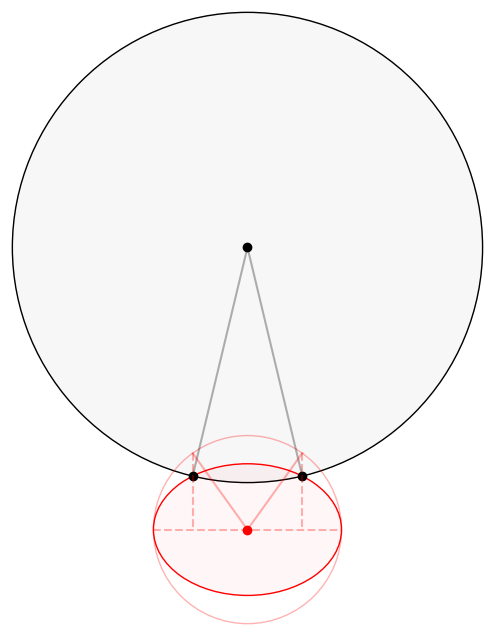

In [43]:
ro = 0.4
b = 1-0.3 # (b=1-f)
xo = 0.0
yo = -1.2 #division by 0 error if 0

x_real, y_real = intersection_points(b, xo, yo, ro)

ax = draw_oblate(b, xo, yo, ro)
ax.plot(x_real,y_real, 'ko')

xi = np.arctan2(y_real,x_real)
ax.plot([0,np.cos(xi[0])],[0,np.sin(xi[0])], 'k-', alpha=0.3)
ax.plot([0,np.cos(xi[1])],[0,np.sin(xi[1])], 'k-', alpha=0.3)

#add the circle bounding the planet to help parametrize the angle phi
anomaly = Circle((xo, yo), ro, fill=False, color='r', alpha=0.3)
ax.add_artist(anomaly)

#horizontal line along the major axis
ax.plot([xo-ro,xo+ro],[yo,yo],'r--',alpha=0.3)

#arctan of y *on the circle circumscribing the occcultor ellipse* to x on the ellipse (drops straight down)
phi = np.arctan2(np.sqrt(ro**2-(x_real-xo)**2),x_real-xo)*np.sign(np.arctan2(y_real-yo,x_real-xo))

#plot the phi angle (parametrized like eccentric anomaly)
ax.plot([xo,xo+ro*np.cos(phi[0])],[yo,yo+ro*np.sin(phi[0])], 'r-', alpha=0.3)
ax.plot([xo,xo+ro*np.cos(phi[1])],[yo,yo+ro*np.sin(phi[1])], 'r-', alpha=0.3)

#plot the line down to the major axis
ax.plot([xo+ro*np.cos(phi[0]), xo+ro*np.cos(phi[0])],[yo+ro*np.sin(phi[0]), yo], 'r--', alpha=0.3)
ax.plot([xo+ro*np.cos(phi[1]), xo+ro*np.cos(phi[1])],[yo+ro*np.sin(phi[1]), yo], 'r--', alpha=0.3)

# The Integrand

$$\mathcal{P}(\mathbf{G}_n) = \int_{\pi - \phi}^{2\pi + \phi}[\ G_{ny}(r_o c_\phi + x_o , r_o b s_\phi + y_o) b c_\phi - G_{nx}(r_o c_\phi + x_o, r_o b s_\phi + y_o)s_\phi]\ r_o d\phi$$


To wrap the angle phi, we find the intersection point between the ellipse and the segment that connects the center of the ellipse and origin. The solution for this is:
$$\left( x_o + \frac{b r_o ^2 \cos \alpha}{\sqrt{(b r_o \cos \alpha)^2 + (r_o \sin \alpha)^2}},  y_o + \frac{b r_o ^2 \sin \alpha}{\sqrt{(b r_o \cos \alpha)^2 + (r_o \sin \alpha)^2}}\right)$$
where $\alpha$ is the angle of the segment to the x axis.

Then, if the angle $\phi_{\text{intersection}}$ which parametrizes this intersection point is in $\phi_0 < \phi_{\text{intersection}} < \phi_1$, $\phi$ is already correctly wrapped. If not, we add $2 \pi$ to $\phi_0$ to wrap it correctly. We may still need to add the edge case of $\phi_0 = \phi_{\text{intersection}} = \phi_1$

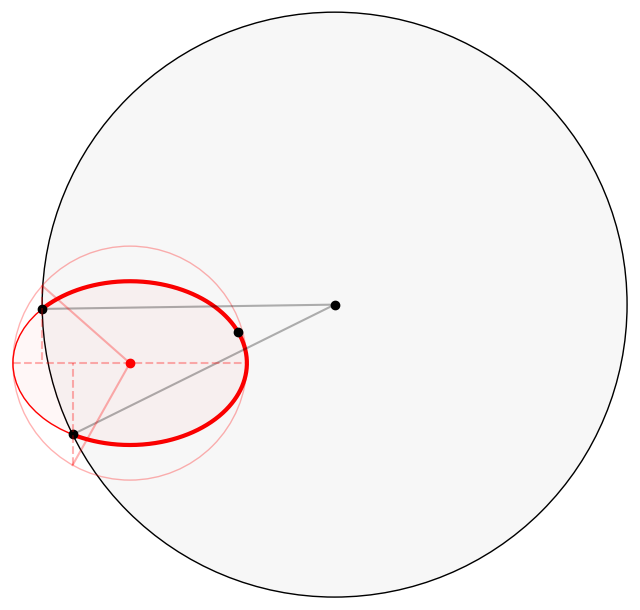

In [244]:
ro = 0.4
b = 1-0.3 # (b=1-f)
xo = -0.7
yo = -0.2#division by 0 error if 0

x_real, y_real = intersection_points(b, xo, yo, ro)

ax = draw_oblate(b, xo, yo, ro)
ax.plot(x_real,y_real, 'ko')

xi = np.arctan2(y_real,x_real)
ax.plot([0,np.cos(xi[0])],[0,np.sin(xi[0])], 'k-', alpha=0.3)
ax.plot([0,np.cos(xi[1])],[0,np.sin(xi[1])], 'k-', alpha=0.3)

#add the circle bounding the planet to help parametrize the angle phi
anomaly = Circle((xo, yo), ro, fill=False, color='r', alpha=0.3)
ax.add_artist(anomaly)

#horizontal line along the major axis
ax.plot([xo-ro,xo+ro],[yo,yo],'r--',alpha=0.3)

#arctan of y *on the circle circumscribing the occcultor ellipse* to x on the ellipse (drops straight down)
phi = np.sort(np.arctan2(np.sqrt(ro**2-(x_real-xo)**2),x_real-xo)*np.sign(np.arctan2(y_real-yo,x_real-xo)))

#plot the phi angle (parametrized like eccentric anomaly)
ax.plot([xo,xo+ro*np.cos(phi[0])],[yo,yo+ro*np.sin(phi[0])], 'r-', alpha=0.3)
ax.plot([xo,xo+ro*np.cos(phi[1])],[yo,yo+ro*np.sin(phi[1])], 'r-', alpha=0.3)

#plot the line down to the major axis
ax.plot([xo+ro*np.cos(phi[0]), xo+ro*np.cos(phi[0])],[yo+ro*np.sin(phi[0]), yo], 'r--', alpha=0.3)
ax.plot([xo+ro*np.cos(phi[1]), xo+ro*np.cos(phi[1])],[yo+ro*np.sin(phi[1]), yo], 'r--', alpha=0.3)
#phi_grid = np.linspace(sort_angles(phi[0], -np.arctan2(yo,xo), phi[1])[0],sort_angles(phi[0], -np.arctan2(yo,xo), phi[1])[1],1000)
alp = np.arctan2(-yo,-xo)
phi_inters_x = xo + (b * ro**2 * np.cos(alp))/np.sqrt((b*ro*np.cos(alp))**2 + (ro*np.sin(alp))**2) 
phi_inters_y = yo + (b * ro**2 * np.sin(alp))/np.sqrt((b*ro*np.cos(alp))**2 + (ro*np.sin(alp))**2)
phi_inters = np.arctan2(-phi_inters_y,-phi_inters_x)

if phi[0] < phi_inters < phi[1]:
    phi_grid = np.linspace(phi[0],phi[1],1000)
else:
    phi_grid = np.linspace(2*np.pi+phi[0],phi[1],1000)

x = np.zeros(1000)
y = np.zeros(1000)
for i, v in enumerate(phi_grid):
    x[i] = ro*np.cos(v) + xo
    y[i] = ro*b*np.sin(v) + yo
ax.plot(x, y, color='r', lw=3,zorder=-1);   